## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [2]:
import pandas
ecommerce_data = pandas.read_csv("cleaned_ecommerce_dataset (1).csv")
print(len(ecommerce_data))

2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [3]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

#Using the in built .head() and .info() methods to have the mentioned rough picture of the data
data_head = ecommerce_data.head()
data_info = ecommerce_data.info()


# Convert categorical features to numerical values using OrdinalEncoder
encoder = OrdinalEncoder()
ecommerce_data[['gender', 'category', 'review']] = encoder.fit_transform(ecommerce_data[['gender', 'category', 'review']])

#To get correlation between the specified columns, we are first listing the columns than using the corr
#method to get the correlation between all of the columns alternativelely we could use the .corr like this:
#data['column1'].corr(df['column2']).corr.....

data_correlation = ecommerce_data[['helpfulness', 'gender', 'category', 'review', 'rating']].corr()
print(data_correlation)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB
             helpfulness    gender  category    review    rating
helpfulness     1.000000  0.075947 -0.013408 -0.028259 -0.007523
gender          0.075947  1.000000  0.022549 -0.037884 -0.034337
category       -0.013408  0.022549  1.000000  0.001970 -0.163158
review         -0.02825

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [4]:
from sklearn.model_selection import train_test_split

# Case 1: Using 10% of the data for training and 90% for testing
# We use the 'test_size' parameter to specify the proportion of the test set (0.9 in this case).
# 'random_state' is set for reproducibility.
X_train_10, X_test_90, y_train_10, y_test_90 = train_test_split(
    ecommerce_data.drop(columns=['rating']), ecommerce_data['rating'], test_size=0.9, random_state=42)

# Case 2: Using 90% of the data for training and 10% for testing
# Similar to above, but now the 'test_size' parameter is set to 0.1.
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(
    ecommerce_data.drop(columns=['rating']), ecommerce_data['rating'], test_size=0.1, random_state=42)

# Print the shapes of training and testing sets
print("Case 1: 10% training data")
print(f"X_train shape: {X_train_10.shape}")
print(f"X_test shape: {X_test_90.shape}")
print(f"y_train shape: {y_train_10.shape}")
print(f"y_test shape: {y_test_90.shape}")

print("\nCase 2: 90% training data")
print(f"X_train shape: {X_train_90.shape}")
print(f"X_test shape: {X_test_10.shape}")
print(f"y_train shape: {y_train_90.shape}")
print(f"y_test shape: {y_test_10.shape}")


Case 1: 10% training data
X_train shape: (268, 10)
X_test shape: (2417, 10)
y_train shape: (268,)
y_test shape: (2417,)

Case 2: 90% training data
X_train shape: (2416, 10)
X_test shape: (269, 10)
y_train shape: (2416,)
y_test shape: (269,)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Identify the most and least correlated features with 'rating' from your previous correlation matrix
# For demonstration, let's assume 'feature_most_1', 'feature_most_2' are most correlated,
# and 'feature_least_1', 'feature_least_2' are least correlated.
feature_most_1 = 'helpfulness'
feature_most_2 = 'gender'
feature_least_1 = 'category'
feature_least_2 = 'review'

# Initialize the Linear Regression model
lr = LinearRegression()

# Train and evaluate Model-a
lr.fit(X_train_10[[feature_most_1, feature_most_2]], y_train_10)
y_pred_a = lr.predict(X_test_90[[feature_most_1, feature_most_2]])
mse_a = mean_squared_error(y_test_90, y_pred_a)

# Train and evaluate Model-b
lr.fit(X_train_10[[feature_least_1, feature_least_2]], y_train_10)
y_pred_b = lr.predict(X_test_90[[feature_least_1, feature_least_2]])
mse_b = mean_squared_error(y_test_90, y_pred_b)

# Train and evaluate Model-c
lr.fit(X_train_90[[feature_most_1, feature_most_2]], y_train_90)
y_pred_c = lr.predict(X_test_10[[feature_most_1, feature_most_2]])
mse_c = mean_squared_error(y_test_10, y_pred_c)

# Train and evaluate Model-d
lr.fit(X_train_90[[feature_least_1, feature_least_2]], y_train_90)
y_pred_d = lr.predict(X_test_10[[feature_least_1, feature_least_2]])
mse_d = mean_squared_error(y_test_10, y_pred_d)

# Print MSE for each model to compare their performance
print(f"Mean Squared Error for Model-a: {mse_a}")
print(f"Mean Squared Error for Model-b: {mse_b}")
print(f"Mean Squared Error for Model-c: {mse_c}")
print(f"Mean Squared Error for Model-d: {mse_d}")


Mean Squared Error for Model-a: 1.8605359903218894
Mean Squared Error for Model-b: 1.776581354691434
Mean Squared Error for Model-c: 1.7245375467700423
Mean Squared Error for Model-d: 1.681992500504392


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Initializing the linear regression model
lr = LinearRegression()

# Training and evaluating Model-a (Using 10% data and most correlatd features)
# Here we fit the model using training data and make predictions on test data
lr.fit(X_train_10[[feature_most_1, feature_most_2]], y_train_10)
y_pred_a = lr.predict(X_test_90[[feature_most_1, feature_most_2]])

# Calculating MSE and RMSE for Model-a
mse_a = mean_squared_error(y_test_90, y_pred_a)
rmse_a = np.sqrt(mse_a)  # RMSE is just the square root of MSE

# Training & evaluating Model-b (using 10% data but least correlated fetaures)
lr.fit(X_train_10[[feature_least_1, feature_least_2]], y_train_10)
y_pred_b = lr.predict(X_test_90[[feature_least_1, feature_least_2]])

# Calculating MSE and RMSE for Model-b
mse_b = mean_squared_error(y_test_90, y_pred_b)
rmse_b = np.sqrt(mse_b)

# Training & evaluating Model-c (90% training data, most correlated features)
# Fittin the model on training data and then making prediction on test data
lr.fit(X_train_90[[feature_most_1, feature_most_2]], y_train_90)
y_pred_c = lr.predict(X_test_10[[feature_most_1, feature_most_2]])

# Calculate MSE and RMSE for Model-c
mse_c = mean_squared_error(y_test_10, y_pred_c)
rmse_c = np.sqrt(mse_c)  # RMSE is squar root of MSE

# Training and Evaluatin Model-d (90% data, least correlated features)
lr.fit(X_train_90[[feature_least_1, feature_least_2]], y_train_90)
y_pred_d = lr.predict(X_test_10[[feature_least_1, feature_least_2]])

# Calcualte MSE and RMSE for Model-d
mse_d = mean_squared_error(y_test_10, y_pred_d)
rmse_d = np.sqrt(mse_d)  # RMSE is sqrt of MSE

# Printing MSE and RMSE for all models to compare their preformance
print(f"Model-a: MSE = {mse_a}, RMSE = {rmse_a}")
print(f"Model-b: MSE = {mse_b}, RMSE = {rmse_b}")
print(f"Model-c: MSE = {mse_c}, RMSE = {rmse_c}")
print(f"Model-d: MSE = {mse_d}, RMSE = {rmse_d}")


Model-a: MSE = 1.8605359903218894, RMSE = 1.3640146591301316
Model-b: MSE = 1.776581354691434, RMSE = 1.3328845991650717
Model-c: MSE = 1.7245375467700423, RMSE = 1.3132164889194935
Model-d: MSE = 1.681992500504392, RMSE = 1.2969165356739007


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

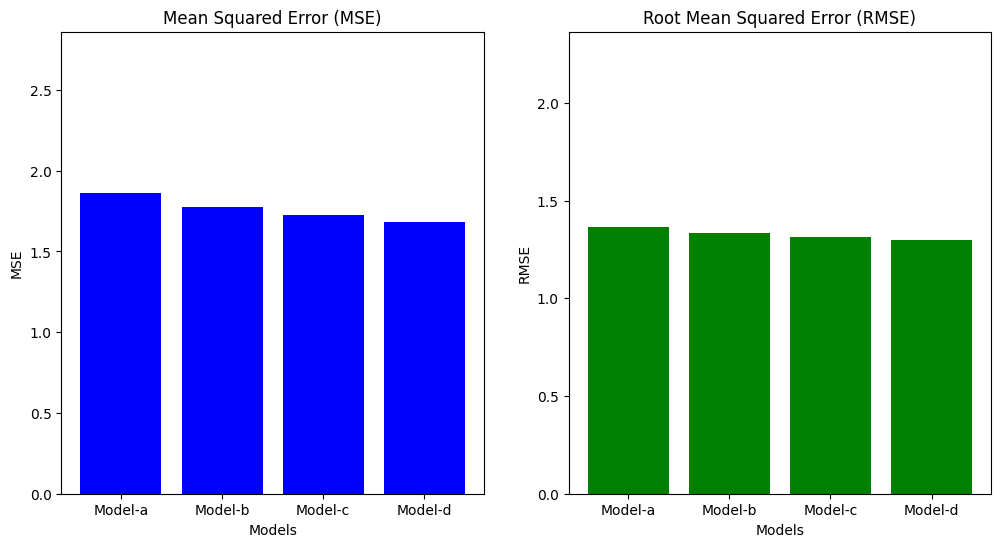

In [7]:
import matplotlib.pyplot as plt

models = ['Model-a', 'Model-b', 'Model-c', 'Model-d']
mse_values = [mse_a, mse_b, mse_c, mse_d]
rmse_values = [rmse_a, rmse_b, rmse_c, rmse_d]

# Creating two subplots side by side, because why not?
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Time to plot MSE first. Going with blue bars this time.
axes[0].bar(models, mse_values, color='blue')
axes[0].set_title('Mean Squared Error (MSE)')  # setting title
axes[0].set_xlabel('Models')  # X-axis label
axes[0].set_ylabel('MSE')  # Y-axis label
# Manually setting the y-axis scale to make it easier to see differences
axes[0].set_ylim([0, max(mse_values) + 1])  

# plot RMSE. Let's go with green bars for this
axes[1].bar(models, rmse_values, color='green')
axes[1].set_title('Root Mean Squared Error (RMSE)')  # title here
axes[1].set_xlabel('Models')  # x label
axes[1].set_ylabel('RMSE')  # y label
# Again, setting y-axis scale so its easier to compare
axes[1].set_ylim([0, max(rmse_values) + 1])  

#Let's see those bar charts.
plt.show()